In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *

import time
import tensorflow as tf

import keras
import sys
print("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

Keras 2.6.0 TF 2.6.0 Python sys.version_info(major=3, minor=7, micro=11, releaselevel='final', serial=0)


#MNIST

In [ ]:
# download the MNIST data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#loop over each class label and sample 100 random images over each label
np.random.seed(seed=486)
idx = np.empty(0, dtype = 'int8')
for i in range(0, len(np.unique(y_train))):
  idx = np.append(idx, np.random.choice(np.where((y_train[:len(y_train)]) == i)[0], 100, replace = False))

x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts = True))

(1000, 28, 28)
(1000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


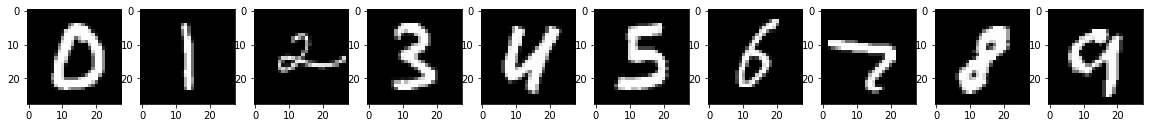

In [ ]:
# show the MNIST images
plt.figure(figsize = (20, 20))
for i in range(0, len(np.unique(y_train))):
  rmd = np.random.choice(np.where(y_train == i)[0], 1)
  plt.subplot(1, 10, i+1)
  img = x_train[rmd].reshape(1, 28, 28, 1)
  plt.imshow(img[0, :, :, 0], cmap = 'gray')

## MNIST visualization

In [ ]:
# PCA for visualization
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(x_train.reshape(len(x_train), 28*28))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

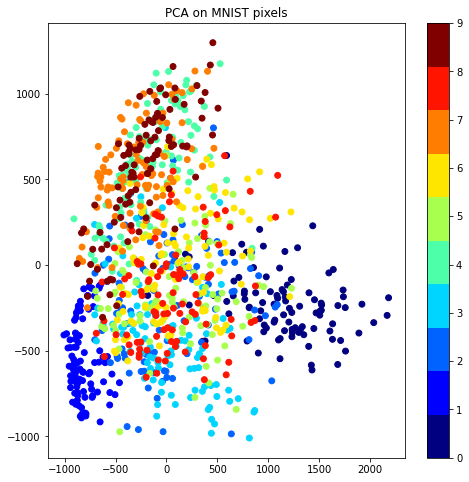

In [ ]:
plt.figure(figsize=(8, 8))
cmap = cm.get_cmap('jet', 10)
x = pca.transform(x_train.reshape(len(x_train), 28*28))[:, 0]
y = pca.transform(x_train.reshape(len(x_train), 28*28))[:, 1]
plt.scatter( x, y , c = y_train, s = 35, cmap = cmap)
plt.title("PCA on MNIST pixels")
plt.colorbar()
plt.show()


## Visualization using t-SNE

In [ ]:
from sklearn.manifold import TSNE
model_MNIST = TSNE(n_components = 2, random_state = 0)
tsne_mnist = model_MNIST.fit_transform(x_train.reshape(len(x_train), 28*28))

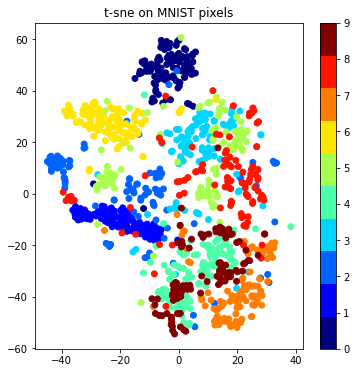

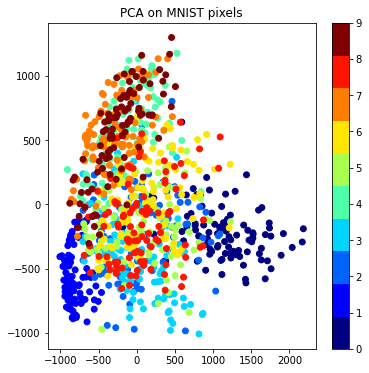

In [ ]:
plt.figure(figsize = (6, 6))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x = tsne_mnist[:, 0], y = tsne_mnist[:, 1], c = y_train, s = 35, cmap = cmap)
plt.title("t-sne on MNIST pixels")
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
cmap = cm.get_cmap('jet', 10)
x = pca.transform(x_train.reshape(len(x_train), 28*28))[:, 0]
y = pca.transform(x_train.reshape(len(x_train), 28*28))[:, 1]
plt.scatter( x, y , c = y_train, s = 35, cmap = cmap)
plt.title("PCA on MNIST pixels")
plt.colorbar()
plt.show()

# CIFAR10 


In [ ]:
# download the CIFAR10 data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [ ]:
labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [ ]:
#loop over each class label and sample 100 random images over each label
np.random.seed(seed=222)
idx = np.empty(0, dtype = 'int8')
for i in range(0, len(np.unique(y_train))):
  idx = np.append(idx, np.random.choice(np.where((y_train[:len(y_train)]) == i)[0], 100, replace = False))

x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts = True))

(1000, 32, 32, 3)
(1000, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


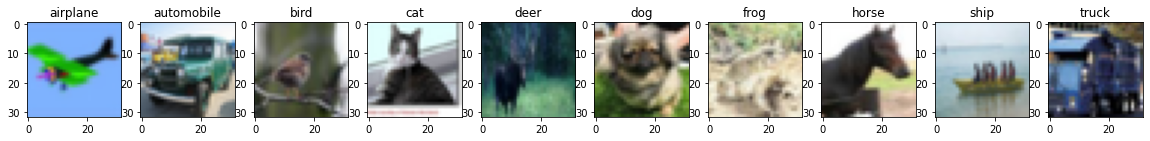

In [ ]:
# show the CIFAR10 images
plt.figure(figsize = (20, 20))
for i in range(0, len(np.unique(y_train))):
  rmd = np.random.choice(np.where(y_train == i)[0], 1)
  plt.subplot(1, 10, i+1)
  img = x_train[rmd]
  plt.imshow(img[0, :, :, :])
  plt.title(labels[i])

In [ ]:
print(img.shape)

(1, 32, 32, 3)


## PCA on CIFAR10 pixels

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca_cifar10_pixels = PCA(n_components=2)
pca_cifar10_pixels.fit(x_train.reshape(len(x_train), 32*32*3))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

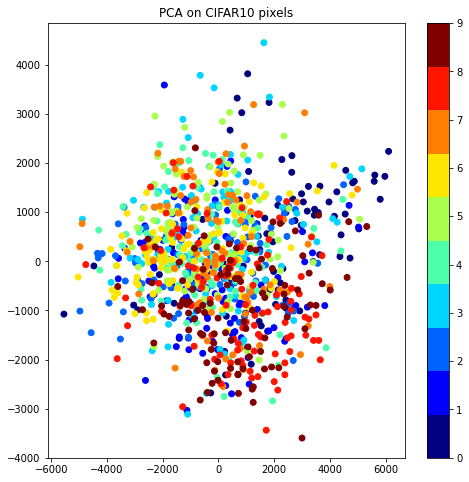

In [ ]:
plt.figure(figsize =(8,8))
cmap = cm.get_cmap('jet', 10)
x = pca_cifar10_pixels.transform(x_train.reshape(len(x_train), 32*32*3))[:, 0]
y = pca_cifar10_pixels.transform(x_train.reshape(len(x_train), 32*32*3))[:, 1]
plt.scatter(x, y, c = y_train.reshape(len(x_train)), s = 35, cmap = cmap)
plt.title('PCA on CIFAR10 pixels')
plt.colorbar()
plt.show()

## t-SNE on CIFAR10 pixels


In [ ]:
# from sklearn.manifold import TSNE
model_cifar10_pixels = TSNE(n_components = 2, random_state=0)
tsne_cifar10_pixels = model_cifar10_pixels.fit_transform(x_train.reshape(len(x_train), 32*32*3))

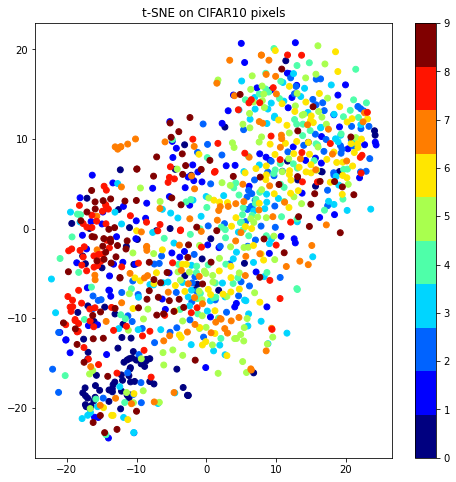

In [ ]:
plt.figure(figsize = (8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x = tsne_cifar10_pixels[:, 0], y = tsne_cifar10_pixels[:, 1], c = y_train.reshape(len(x_train)), s = 35, cmap = cmap)
plt.title('t-SNE on CIFAR10 pixels')
plt.colorbar()
plt.show()

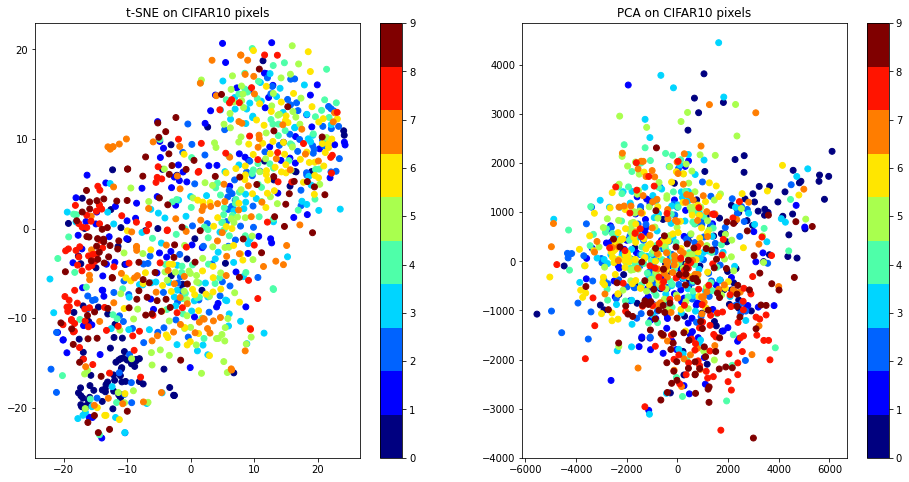

In [ ]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
cmap = cm.get_cmap('jet', 10)
plt.scatter(x = tsne_cifar10_pixels[:, 0], y = tsne_cifar10_pixels[:, 1], c = y_train.reshape(len(x_train)), s = 35, cmap = cmap)
plt.title('t-SNE on CIFAR10 pixels')
plt.colorbar()


plt.subplot(1, 2, 2)
cmap = cm.get_cmap('jet', 10)
x = pca_cifar10_pixels.transform(x_train.reshape(len(x_train), 32*32*3))[:, 0]
y = pca_cifar10_pixels.transform(x_train.reshape(len(x_train), 32*32*3))[:, 1]
plt.scatter(x, y, c = y_train.reshape(len(x_train)), s = 35, cmap = cmap)
plt.title('PCA on CIFAR10 pixels')
plt.colorbar()
plt.show()

## CIFAR10 visualization with VGG features

In [ ]:
import urllib
import os
if not os.path.isfile('cifar_EMB_1000.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/si287al91c1ls0d/cifar_EMB_1000.npz?dl=1",
    "cifar_EMB_1000.npz")
%ls -hl cifar_EMB_1000.npz
Data=np.load("cifar_EMB_1000.npz")
vgg_features_cifar = Data["arr_0"]

-rw-r--r-- 1 root root 18M Sep  3 14:14 cifar_EMB_1000.npz


In [ ]:
print(vgg_features_cifar.shape)

(1000, 4096)


In [ ]:
32*32*3

3072

## PCA on VGG features of CIFAR10

In [ ]:
pca_cifar10_vgg = PCA(n_components=2)
pca_cifar10_vgg.fit(vgg_features_cifar)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

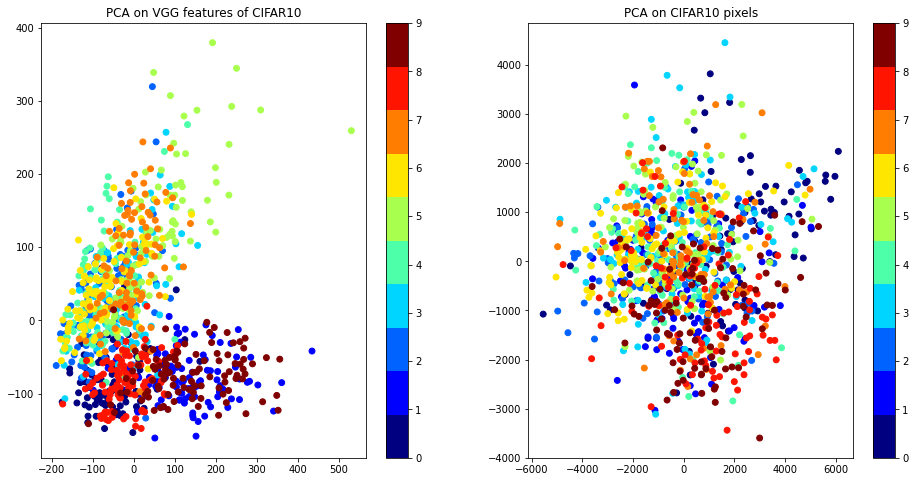

In [ ]:
plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
x = pca_cifar10_vgg.transform(vgg_features_cifar)[:, 0]
y = pca_cifar10_vgg.transform(vgg_features_cifar)[:, 1]
plt.scatter(x, y , c = y_train.reshape(len(x_train)), s = 35, cmap=cmap)
plt.colorbar()
plt.title('PCA on VGG features of CIFAR10')


plt.subplot(1, 2, 2)
cmap = cm.get_cmap('jet', 10)
x = pca_cifar10_pixels.transform(x_train.reshape(len(x_train), 32*32*3))[:, 0]
y = pca_cifar10_pixels.transform(x_train.reshape(len(x_train), 32*32*3))[:, 1]
plt.scatter(x, y, c = y_train.reshape(len(x_train)), s = 35, cmap = cmap)
plt.title('PCA on CIFAR10 pixels')
plt.colorbar()
plt.show()

## t-SNE on CIFAR10 VGG features

In [ ]:
model_cifar10_vgg = TSNE(n_components=2, random_state=0)
tsne_cifar10_vgg = model_cifar10_vgg.fit_transform(vgg_features_cifar)

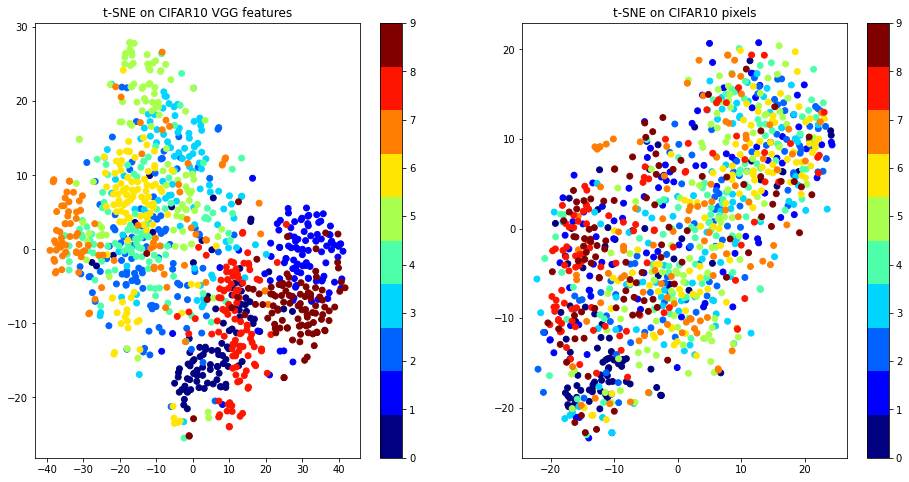

In [ ]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
cmap = cm.get_cmap('jet', 10)
plt.scatter(x = tsne_cifar10_vgg[:, 0], y = tsne_cifar10_vgg[:, 1], c = y_train.reshape(len(x_train)), s = 35, cmap = cmap)
plt.title('t-SNE on CIFAR10 VGG features')
plt.colorbar()


plt.subplot(1, 2, 2)
cmap = cm.get_cmap('jet', 10)
plt.scatter(x = tsne_cifar10_pixels[:, 0], y = tsne_cifar10_pixels[:, 1], c = y_train.reshape(len(x_train)), s = 35, cmap = cmap)
plt.title('t-SNE on CIFAR10 pixels')
plt.colorbar()

Text(0.5, 1.0, 'PCA on VGG features of CIFAR10')

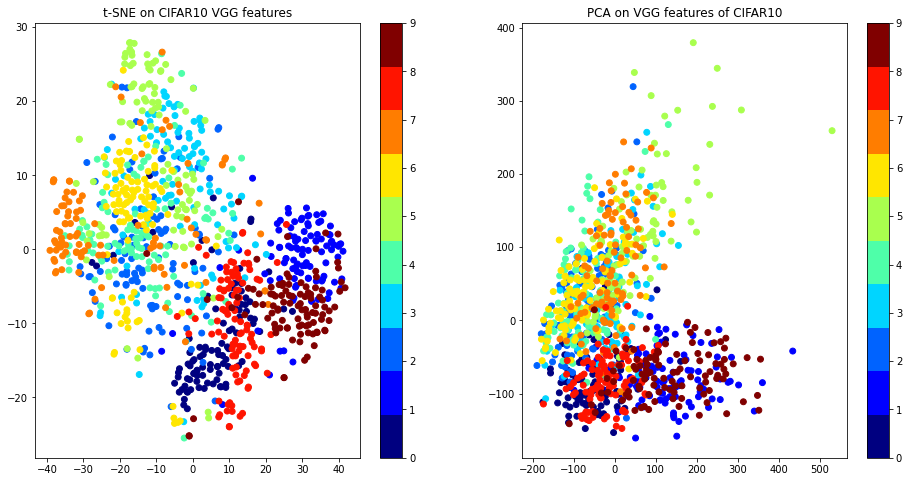

In [ ]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
cmap = cm.get_cmap('jet', 10)
plt.scatter(x = tsne_cifar10_vgg[:, 0], y = tsne_cifar10_vgg[:, 1], c = y_train.reshape(len(x_train)), s = 35, cmap = cmap)
plt.title('t-SNE on CIFAR10 VGG features')
plt.colorbar()

plt.subplot(1, 2, 2)
x = pca_cifar10_vgg.transform(vgg_features_cifar)[:, 0]
y = pca_cifar10_vgg.transform(vgg_features_cifar)[:, 1]
plt.scatter(x, y , c = y_train.reshape(len(x_train)), s = 35, cmap=cmap)
plt.colorbar()
plt.title('PCA on VGG features of CIFAR10')